# Stack Overflow 2019 Survey Analysis: The Data Scientists Tribe
### Who are they? What do they know? Do they know things? Lets Find Out!

<br><br>
The motivation behind this analysis is to gain more insights about the role of a Data Scientist and how it compares to other developers. As it is a relatively new role compared to others, there is often no clear understanding of what the job of a data scientist involves or what the background of a data scientist is, a fact that is reflected on the job description in many job postings asking for a data scientist. In addition, we would like to compare the data scientists with the other developer roles in terms of women representation in the field. Finally, we would like to see if data scientists are actually paid more than other developers and what correlates with a higher salary for a data scientist.
<br>

So we are asking the data:

###  QUESTION 1. What is the educational background of data scientists and how is it different from developers in general?
- Do more data scientists have degrees higher than a Bachelor's degree (Master's or Phds) compared to other developers?
- Are there more data scientists coming from a non-CS backgrounds than other developers? 

### QUESTION 2. Is the gender gap smaller in data scientists than in other developer roles?
- Are data scientists doing better in terms of gender balance in the workspace?


### QUESTION 3. Are data scientists paid more than other developers? What correlates with higher salary?
- Do data scientists get payed more than other roles? Compare each salary vs years of professional coding experience for each role.
- How does the level of education correlate with salary? Does a Phd pay more?
- Does a software engineering background leads to a higher salary for data scientists compared to other educational backgrounds?
- Which combination of role titles gets paid more? What company size pays data scientists more?

In [1]:
# To align plots in the middle of the notebook

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import time
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from cycler import cycler
plt.style.use('bmh')
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

## Data exploration

First of all, let's take a look at the data:

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
print('The are {} respondents and {} columns  in the dataset'.format(df.shape[0],df.shape[1]))

The are 88883 respondents and 85 columns  in the dataset


In [5]:
# Show column names
df.columns.values

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

In [6]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    # We need to turn it to a list because otherwise it returns a Series object!
    desc = list(schema[schema.Column == column_name]['QuestionText'])[0]
    return desc

## Data Cleaning

In [7]:
# Drop Respondent
df = df.drop('Respondent', axis=1)

# Convert YearsCodePro column to int

df['YearsCodePro'].value_counts()

df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})
df['YearsCodePro'] = df['YearsCodePro'].astype(float)
df['YearsCodePro'].describe()

count    74331.000000
mean         8.185865
std          7.644169
min          0.500000
25%          3.000000
50%          6.000000
75%         11.000000
max         55.000000
Name: YearsCodePro, dtype: float64

### Remove students

For the scope of this analysis, we are only interested in professional developers. Therefore we are going to exlude
from the dataset those who are currelntly students which is about 1/4 of the respondents.

In [8]:
print(get_description('Student'))
student_status = df['Student'].value_counts(normalize=True);
print(round(student_status,2))

df = df[df['Student'].str.contains("No",na=False)]
df.shape

Are you currently enrolled in a formal, degree-granting college or university program?
No                0.76
Yes, full-time    0.18
Yes, part-time    0.06
Name: Student, dtype: float64


(65816, 84)

### Find the Data Scientists

In [9]:
get_description('DevType')

'Which of the following describe you? Please select all that apply.'

In [10]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                    7296
Developer, back-end                                                                                                                                                                      4258
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                           2119
Developer, front-end                                                                                                                                                                     1889
Developer, back-end;Developer, full-stack                                                                                                                                                1805
                                                  

<br> As we see, every respondent can have multiple role titles. We need to clean this column to understand the count per role title.<br>

In [11]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [12]:
def clean_and_plot(df, column_name, possible_vals, title, plot=True, percentage=True):
    '''
    INPUT 
        df - a dataframe holding the column to clean
        column_name - the question that has multiple possible answers
        possible_vals - a list with the possible answers for that question
        title - string of the plot title
        axis - axis object
        plot - bool providing whether or not you want a plot back
        percentage - bool providing whether we want the result as a percentage or a total count
        
    OUTPUT
        new_df - a dataframe with the percentage of the individuals per possible answer
        Displays a plot for the column.
    '''
    col = df[column_name].value_counts().reset_index()
    col.rename(columns={'index': 'type', column_name: 'count'}, inplace=True)
    count_df = total_count(col, 'type', 'count', possible_vals)

    count_df.set_index('type', inplace=True)
    if plot:
        if percentage:
            (count_df/df.shape[0]).plot(kind='barh', legend=None)
        else:
            count_df.plot(kind='barh', legend=None);
        plt.title(title);
        plt.gca().invert_yaxis()
        plt.show()
    if percentage:
          new_df = count_df/df.shape[0]
    else:
        new_df = count_df
    new_df.index.name = None
    return new_df


In [13]:
# Clean data for DevType

devttype_vals = ["Academic Researcher", "Data or business analyst", "Data scientist or machine learning specialist",
                 "Database administrator", "Designer", "Developer, full-stack", "Developer, back-end", 
                 "Developer, front-end", "Developer, mobile", "Developer, desktop or enterprise applications",
                 "Developer, embedded applications or devices", "Developer, QA or test", "DevOps specialist",
                 "Developer, game or graphics", "Educator", "Engineering manager", "Engineer, data",
                 "Engineer, site reliability", "Marketing or sales professional", "Product manager", "Scientist",
                 "Senior Executive (CSuite, VP, etc.)", "Student", "System administrator", "Other"]

devtype_df = clean_and_plot(df,'DevType', devttype_vals, "Developer Type", plot=False, percentage=False)   
devtype_df

,count
"Developer, full-stack",33646
"Developer, back-end",31703
"Developer, front-end",20509
"Developer, desktop or enterprise applications",13450
"Developer, mobile",10808
DevOps specialist,7480
Database administrator,7375
System administrator,6942
Designer,6582
"Developer, embedded applications or devices",5389


<br>We would like to explore all respondents that indentified with at least one data-related role, that is `Data or business analyst`, `Data scientist or machine learning specialist` and `Data engineer`. <br><br> 
This is because in the real world most of the times their duties are interchangeable (job listings that ask for Data Analysts require the work of a Data Scientist or Data Scientists often need to perform tasks that are more of a Data Engineer's responsability, especially in smaller companies). <br><br>
So we will keep 4 dataframes, one for all data roles and one for each role in order to allow us to be more specific our generic in different points of the analysis.

In [14]:
# Keep all data related roles in the df_data dataframe
df_data = df[df['DevType'].str.contains("Data | data",na=False)]
df_data.shape

# Data scientists
df_ds = df[df['DevType'].str.contains("Data scientist",na=False)]
df_ds.shape

# Data engineers
df_deng = df[df['DevType'].str.contains("Engineer, data",na=False)]
df_deng.shape

# Data analysts
df_da = df[df['DevType'].str.contains("analyst",na=False)]
df_da.shape

(4721, 84)

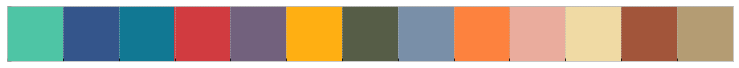

In [15]:
# Set custom palette with Pantone colors of the year because 

palette = ['#4ec5a5','#34558b','#117893','#d13b40','#72617d', '#ffaf12','#565d47', '#798fa8','#fd823e',
           '#eaac9d','#f0daa4','#a2553a', '#b49c73']
sns.palplot(sns.color_palette(palette))

In [16]:
# Functions to compare the data scientists to all developers based on a column

def compare(df1, df2, column_name):
    '''
    INPUT 
        df1 - a dataframe related to data scientists
        df2 - a dataframe of all developers
        column_name - name of the column by which we want to compare the two dataframes
      
    OUTPUT
        compare_df - a dataframe with rows the values of the column_name and 2 columns, the data scientists and all the
                     respondents
    '''
    
    vals1 = df1[column_name].value_counts(normalize=True);
    vals2 = df2[column_name].value_counts(normalize=True);

    compare_df = vals1.rename('data').to_frame()\
               .join(vals2.rename('all').to_frame())

    return compare_df

def remove_parentheses(df):
    '''
    INPUT:
    df - the pandas dataframe you want to edit

    OUTPUT:
    new_df - a dataframe without parentheses in the index
    '''
    for i in range(df.shape[0]):
        value = df.index[i]
        result = re.sub("[\(\[].*?[\)\]]", "", value)
        df = df.rename(index={value : result})
    return df


def compare_plot(compare_df, plot_title, parentheses=True):
    '''
    Prints a barplot comparing the columns of the compare_df.
    
    INPUT 
        compare_df - a dataframe related to data scientists
        plot_title - a dataframe of all developers
        parentheses - boolean to choose we want to keep parentheses in the xticks or not. This is helpful as some answers
                      are particulary long and are better displayed when omitting the parentheses

    OUTPUT
       None
    '''
    
    if(not parentheses):
        compare_df = remove_parentheses(compare_df)
    
    index = np.arange(compare_df.shape[0])
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(10, 10))


    ax.barh(index, compare_df['data'], bar_width,
                    label="Data Scientists", color=palette[0])

    ax.barh(index+bar_width, compare_df['all'],
                     bar_width, label="All Developers",color=palette[1])
    

    ax.set_xlabel('Percentage (%)',fontsize=15)
    ax.set_title(plot_title, fontsize=20)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(compare_df.index)
    ax.tick_params(axis='both', labelsize=15)
    ax.legend(fontsize=15, loc='lower right')
    ax.invert_yaxis()
    plt.show()


### Are data scientists developers? 

We said we will compare data scientists with other developers. But do data scientists consider themselves as developers? Let's see what they think.

In [17]:
get_description('MainBranch')

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [18]:
main_branch_df = compare(df_ds, df, 'MainBranch')
main_branch_df.head()

,data,all
I am a developer by profession,0.743482,0.826048
"I am not primarily a developer, but I write code sometimes as part of my work",0.203678,0.087533
I am a student who is learning to code,0.020251,0.033402
I code primarily as a hobby,0.017225,0.033708
"I used to be a developer by profession, but no longer am",0.015363,0.019309


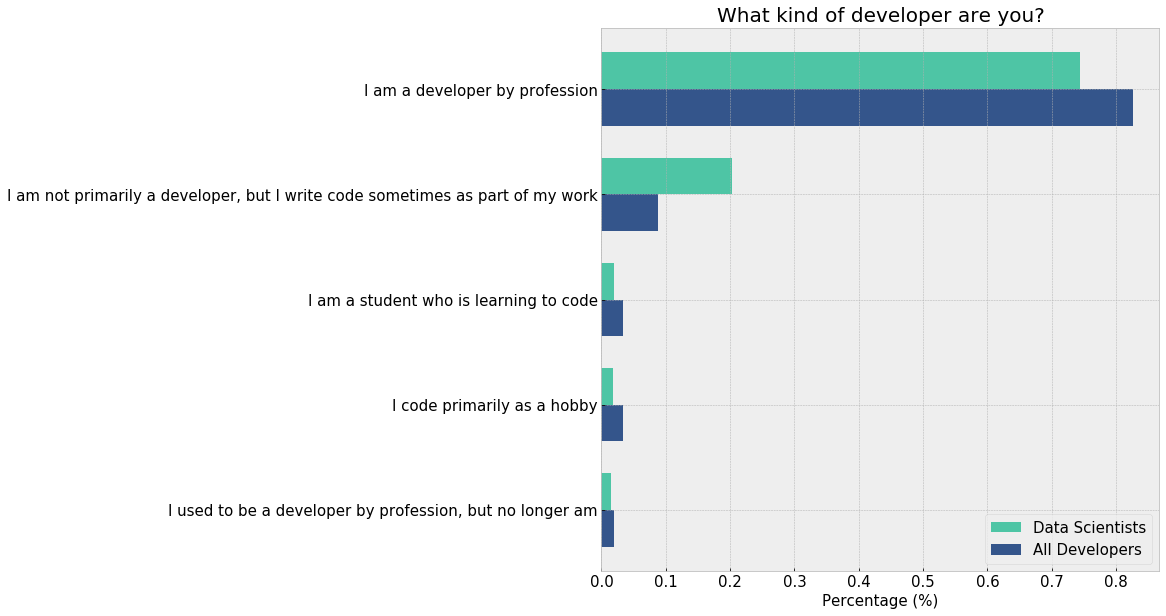

In [19]:
compare_plot(main_branch_df, "What kind of developer are you?", parentheses=True)

We see a clear difference in the answers, as **20% of Data Scientists** think they are **not primarily a developer** comparing to the **9%** of all respondents.

##  QUESTION 1. What is the educational background of data scientists and how is it different from other roles?

Now that we explored the data, let's go an answer our first question.<br><br>


### Highest level of formal education
First, we want to know if data scientists have an education level higher than a Bachelor's degree (Master's or Phds) compared to other developers.

In [20]:
get_description('EdLevel')

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [21]:
#Provide a pandas series of the counts for each FormalEducation status

ed_vals_data = df_ds['EdLevel'].value_counts(normalize=True);
ed_vals = df['EdLevel'].value_counts(normalize=True);

df_edu_data = ed_vals_data.rename_axis('education').reset_index(name='percentage')
high_edu_data = df_edu_data['percentage'][1]+df_edu_data['percentage'][3]
print("Data scientits: {:.2f}% have a Master's or a doctoral degree.".format(high_edu_data))
df_edu_data.head()      
   

Data scientits: 0.39% have a Master's or a doctoral degree.


,education,percentage
0,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",0.392281
1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",0.330526
2,"Other doctoral degree (Ph.D, Ed.D., etc.)",0.162105
3,Some college/university study without earning ...,0.057778
4,"Secondary school (e.g. American high school, G...",0.022222


In [22]:
df_edu = ed_vals.rename_axis('education').reset_index(name='percentage')
high_edu = df_edu['percentage'][1]+df_edu['percentage'][5]
print("All developers: {:.2f}% have a Master's or a doctoral degree.".format(high_edu))
df_edu.head()   

All developers: 0.28% have a Master's or a doctoral degree.


,education,percentage
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",0.477425
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",0.252835
2,Some college/university study without earning ...,0.107794
3,"Secondary school (e.g. American high school, G...",0.061543
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",0.033468


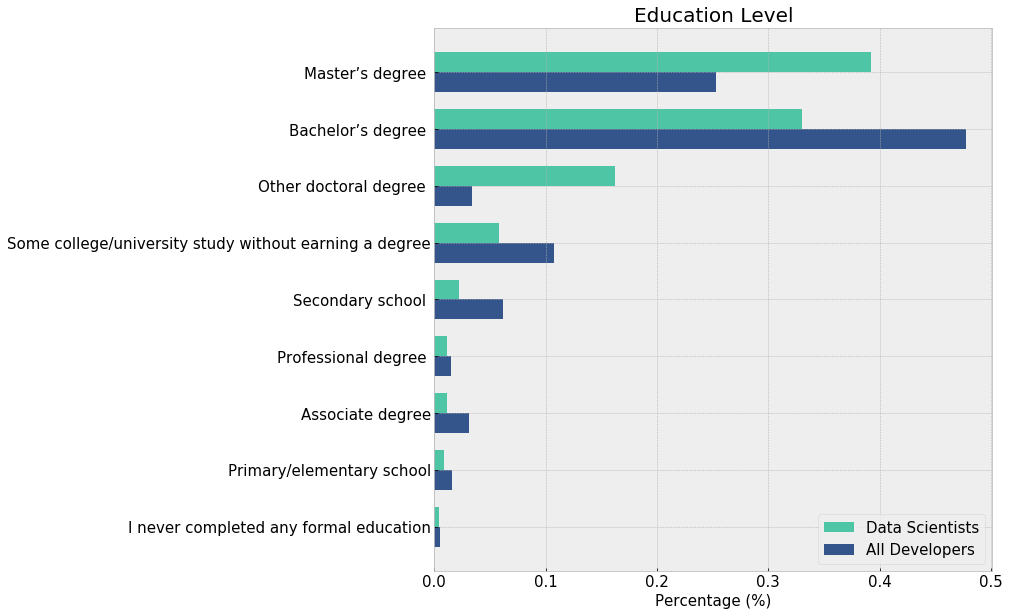

In [23]:
graph_df = compare(df_ds, df, 'EdLevel')
compare_plot(graph_df, 'Education Level', parentheses=False)

### Undergraduate Major

Now let's explore the second part of Question 1. <br>
Are there more data scientists coming from a non-CS backgrounds than other developers?

In [24]:
get_description('UndergradMajor')

'What was your main or most important field of study?'

In [25]:
major_df = compare(df_ds, df, 'UndergradMajor')
major_df

,data,all
"Computer science, computer engineering, or software engineering",0.479455,0.609707
Mathematics or statistics,0.142574,0.040503
"A natural science (ex. biology, chemistry, physics)",0.131436,0.045557
"Another engineering discipline (ex. civil, electrical, mechanical)",0.109653,0.087745
"Information systems, information technology, or system administration",0.035891,0.069876
"A social science (ex. anthropology, psychology, political science)",0.031683,0.019775
"A business discipline (ex. accounting, finance, marketing)",0.028218,0.025919
"A humanities discipline (ex. literature, history, philosophy)",0.016584,0.023876
Web development or web design,0.007426,0.040027
"Fine arts or performing arts (ex. graphic design, music, studio art)",0.007178,0.019145


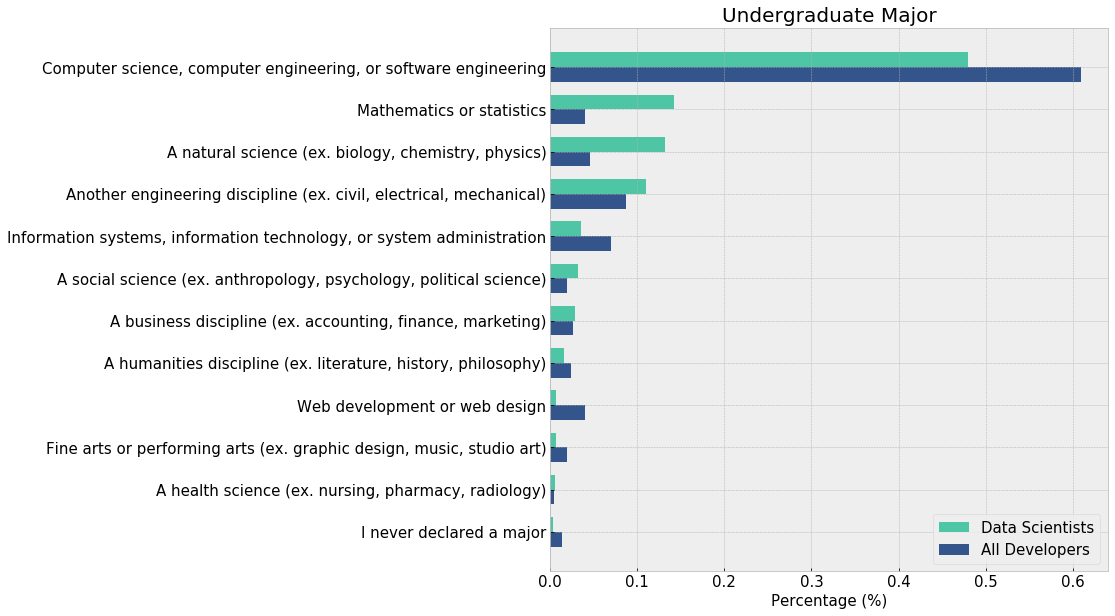

In [26]:
compare_plot(major_df, 'Undergraduate Major')

### Explore other education

Finally let's check if there are any differences in other forms of education, that respondents have participated in like bootcamps or online courses.

In [27]:
get_description('EduOther')

'Which of the following types of non-degree education have you used or participated in? Please select all that apply.'

In [28]:
df['EduOther'].value_counts()

other_edu_vals = ["Taught yourself a new language, framework, or tool without taking a formal course",
                   "Taken an online course in programming or software development (e.g. a MOOC)",
                   "Contributed to open source software", "Received on-the-job training in software development",
                   "Participated in a full-time developer training program or bootcamp", "None of these",
                   "Taken a part-time in-person course in programming or software development",
                   "Completed an industry certification program (e.g. MCPD)", "Participated in a hackathon",
                   "Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)"]

props_df = clean_and_plot(df,'EduOther', other_edu_vals, "Other Education",plot=False)
props_df_data = clean_and_plot(df_ds,'EduOther', other_edu_vals, "Other Education", plot=False)

props_df_data = props_df_data.rename(columns={"count": "data"})
props_df = props_df.rename(columns={"count": "all"})

other_edu_df = props_df_data.join(props_df)
other_edu_df

,data,all
"Taught yourself a new language, framework, or tool without taking a formal course",0.884562,0.847879
Taken an online course in programming or software development (e.g. a MOOC),0.700974,0.571624
Contributed to open source software,0.483310,0.415036
Received on-the-job training in software development,0.397311,0.407697
Participated in a hackathon,0.340519,0.248070
"Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)",0.315484,0.234138
Taken a part-time in-person course in programming or software development,0.205841,0.174441
Completed an industry certification program (e.g. MCPD),0.161567,0.157971
Participated in a full-time developer training program or bootcamp,0.153917,0.149341


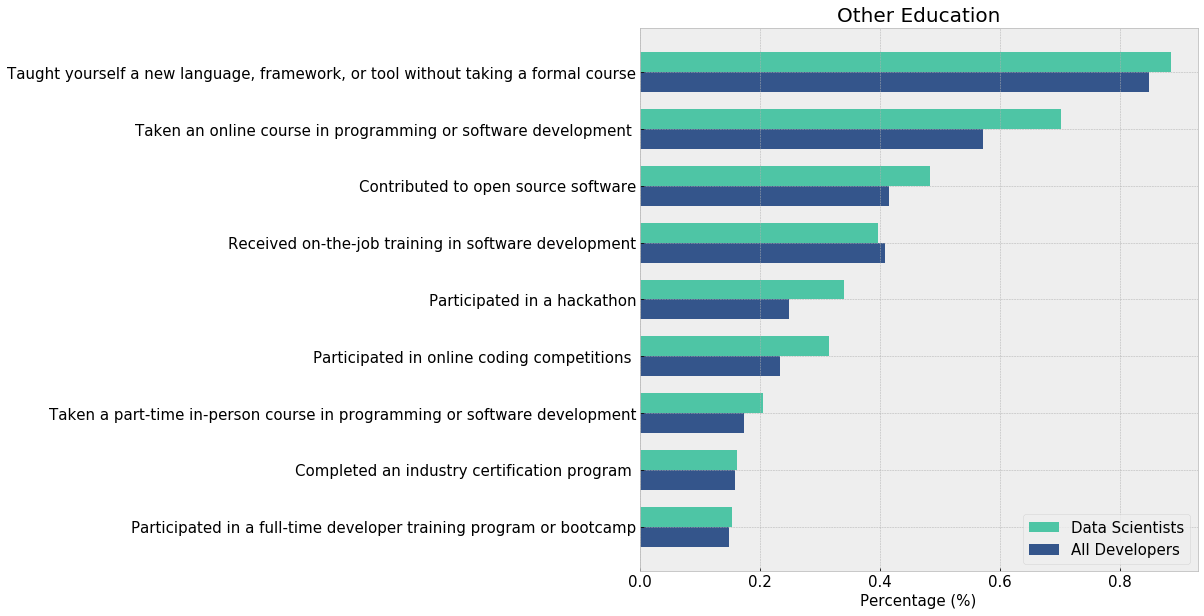

In [29]:
compare_plot(other_edu_df, 'Other Education', parentheses=False)

### Results for Question 1

Data Scientist have a different educational background compared to other developer roles.
- Regarding the highest level of formal education obtained, **39% of Data Scientists have completed a Master's or a Phd degree** compared to **28%** of the developers in general.
- Regarding the undergraduate major, **48% of Data Scientists have completed a Computer Science or Software Engineering related degree** compared to **61%** of the developers in general.
- There is no difference between data scientists and other developers regarding other types of non-degree education that they have participated in. About one in four data scientists have taught themselves a language or tool and one in five have taken an online course.

## QUESTION 2. Is the gender gap smaller in data scientists than in other roles?



In [30]:
data_gender_df = compare(df_ds, df, 'Gender')
data_gender_df

,data,all
Man,0.911701,0.914870
Woman,0.075616,0.073159
"Non-binary, genderqueer, or gender non-conforming",0.006939,0.006722
"Man;Non-binary, genderqueer, or gender non-conforming",0.002393,0.002037
"Woman;Non-binary, genderqueer, or gender non-conforming",0.001914,0.001896
Woman;Man,0.000957,0.000799
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",0.000479,0.000517


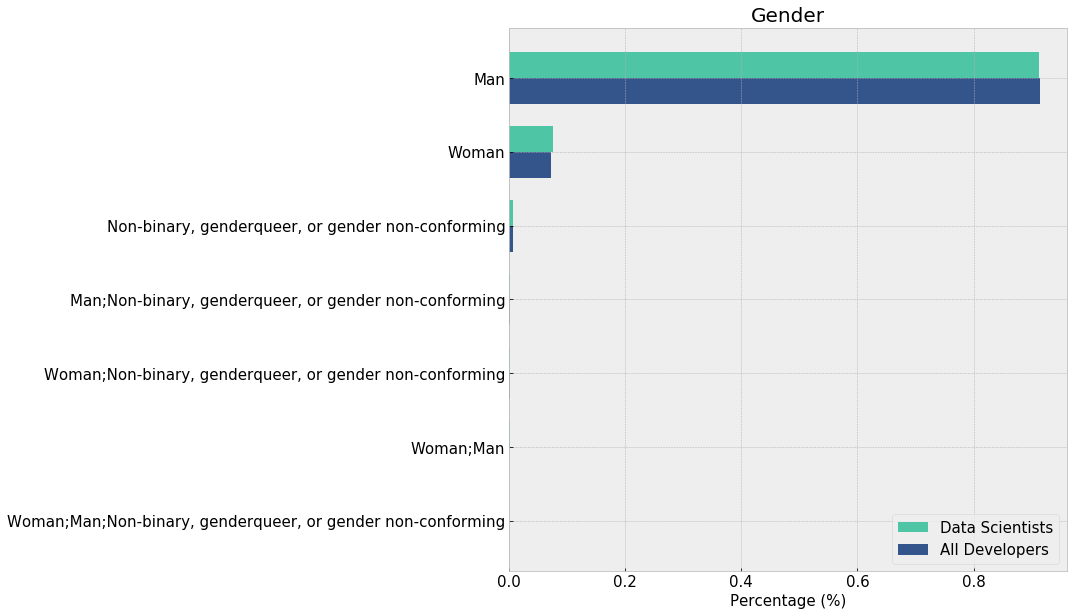

In [31]:
compare_plot(data_gender_df,"Gender")

We clearly see that there are dramatically more men than women, and the differences between all developers and data scientists is very small. <br>
Therefore, in order to better understand the representation from men and women in different developer roles, we will compare data scientists with other developer types.

In [32]:
devtype_df

,count
"Developer, full-stack",33646
"Developer, back-end",31703
"Developer, front-end",20509
"Developer, desktop or enterprise applications",13450
"Developer, mobile",10808
DevOps specialist,7480
Database administrator,7375
System administrator,6942
Designer,6582
"Developer, embedded applications or devices",5389


In [33]:
# Get dataframes of some of the rest developer types
df_devops = df[df['DevType'].str.contains("DevOps ",na=False)]
df_fullstack = df[df['DevType'].str.contains("full-stack",na=False)]
df_frontend = df[df['DevType'].str.contains("front-end",na=False)]
df_sre = df[df['DevType'].str.contains("reliability",na=False)]
df_designer = df[df['DevType'].str.contains("Designer",na=False)]
df_mobile = df[df['DevType'].str.contains("mobile",na=False)]
df_sysad = df[df['DevType'].str.contains("System administrator",na=False)]
df_qa = df[df['DevType'].str.contains("QA",na=False)]


# Choose some to plot in order to compare
dev_dataframes = [df_ds, df_devops, df_fullstack, df_frontend , df_sre, df_designer, df_mobile, df_sysad, df_deng, df_da]
dev_roles = ["Data Scientist", "DevOps Specialist", "Full-stack Developer", "Front-End Developer",
            "Site Reliability Engineer", "Designer", "Mobile Developer", "System Administrator",
            "Data Engineer", "Data Analyst"]

In [34]:
df['Gender'].value_counts()

Man                                                            58387
Woman                                                           4669
Non-binary, genderqueer, or gender non-conforming                429
Man;Non-binary, genderqueer, or gender non-conforming            130
Woman;Non-binary, genderqueer, or gender non-conforming          121
Woman;Man                                                         51
Woman;Man;Non-binary, genderqueer, or gender non-conforming       33
Name: Gender, dtype: int64

In [35]:
def get_gender_ratio(df):
    gender = df['Gender'].value_counts(normalize=True);
    ratio = round(gender['Man'] / gender['Woman'], 1)
    return ratio

def get_gender_percentage(df):
    gender = df['Gender'].value_counts(normalize=True);
    percentage =  round( ((gender['Woman'] * 100 )/ gender['Man']), 1)
    return percentage

def get_count(df):
    return df.shape[0]

In [36]:
# Get percentages of men to women in all developer types
all_ratio = get_gender_ratio(df)

# Get ratios of men to women in different developer types
gender_ratio = []
for d in dev_dataframes:
    gender_ratio.append(get_gender_ratio(d))
    
gender_ratio   

[12.1, 32.1, 16.3, 11.8, 28.4, 13.2, 16.3, 29.7, 18.1, 12.7]

In [37]:
# Get percentages of women in all developer roles
p = get_gender_percentage(df)

# Get percentages of women in different developer roles
gender_percentage = []

for d in dev_dataframes:
    gender_percentage.append(get_gender_percentage(d))
    
gender_percentage

[8.3, 3.1, 6.1, 8.5, 3.5, 7.6, 6.1, 3.4, 5.5, 7.9]

In [38]:
# Get count of different developer roles
dev_count = []

for d in dev_dataframes:
    dev_count.append(get_count(d))
    
dev_count

[4314, 7480, 33646, 20509, 2434, 6582, 10808, 6942, 4383, 4721]

In [39]:
p, all_ratio

(8.0, 12.5)

In [40]:
# Create dataframe for scatter plot

gender_df = pd.DataFrame({
    'Count': dev_count,
    'Ratio': gender_ratio,
    'Percentage': gender_percentage,
    'Role': dev_roles
})

In [41]:
gender_df.sort_values('Ratio')

,Count,Ratio,Percentage,Role
3,20509,11.8,8.5,Front-End Developer
0,4314,12.1,8.3,Data Scientist
9,4721,12.7,7.9,Data Analyst
5,6582,13.2,7.6,Designer
2,33646,16.3,6.1,Full-stack Developer
6,10808,16.3,6.1,Mobile Developer
8,4383,18.1,5.5,Data Engineer
4,2434,28.4,3.5,Site Reliability Engineer
7,6942,29.7,3.4,System Administrator
1,7480,32.1,3.1,DevOps Specialist


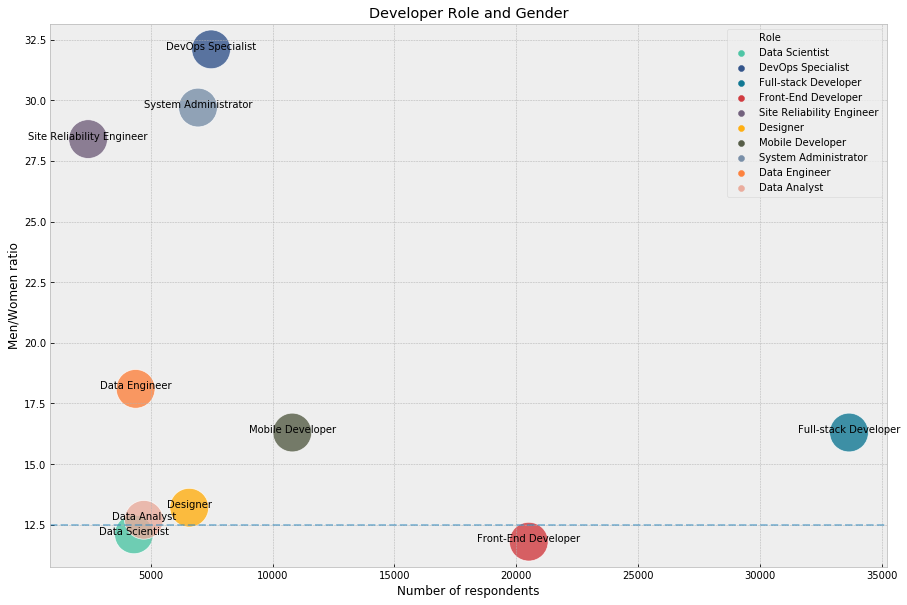

In [42]:
# Create scatter plot of ratio men to women for different developer roles

plt.figure(figsize = (15,10))

ax = sns.scatterplot(gender_df.Count, gender_df.Ratio, alpha = 0.8, 
                     hue=gender_df.Role, s=1500, palette=sns.color_palette(palette,gender_df.shape[0]))

ax.set(xlabel='Number of respondents', ylabel='Men/Women ratio', title='Developer Role and Gender')

# Create a line to show the average ratio 
ax.axhline(all_ratio, ls='--', alpha=0.5)

# For each point, we add a text inside the bubble
for line in range(0, gender_df.shape[0]):
     ax.text(gender_df.Count[line], gender_df.Ratio[line], gender_df.Role[line], horizontalalignment='center')

The graph above illustrates the men to women ratio for different developer roles. The blue line shows the average, which is a ratio of 12.5 meaning that there are 12.5 times more men than women in all developer roles.

### Results for Question 2

In all types of developers, there is a huge difference in the number of respondents who identify as men than women. Remember that we only consider professional developers as we have removed students from the dataset. The total number of male professional developers who participated in the survey was 58387, whereas the number of female professional deveopers was 4669 corresponding to **ratio of 12.5 men to women for all developers**.<br>

Although initially we couldn't see if the gender gap was smaller in the data scientists than in developers in general, when we splitted by role, we saw that Data Scientists has a ratio of around 12.1, which one of the smallest, together with Front-end Developers(11.8) and Designers (13.2).

On the other hand, the graph illustrated that in certain roles, the gender gap grows much bigger: DevOps Specialists had the worst ratio(32.1), following by System Administratos(29.7) and Site Reliability Engineers (28.4)<br>

The results show that there are **12 times more men than women among Data Scientists**, a ratio that is relatively low compared to other types of developers like **DevOps Specialists**, who are **32 times more likely to men than women** <br>

In terms of percentages, **8.3% of Data Scientists** identified as women, compared to **8% of all developers**, while the percentage in other types of developers was **8.5%** of Front-End Developers, **6.1%** of Full-stack Developers, **3.5%** of Site Reliability Engineers and **3.1%** of DevOps Specialists.

## QUESTION 3. Are data scientists paid more than other developers? What correlates with higher salary?
- Do data scientists get payed more than other roles? Compare each salary vs years of professional coding experience for each role.
- How does the level of education correlate with salary? Does a Phd pay more?
- Does a software engineering background leads to a higher salary for data scientists compared to other educational backgrounds?
- Which combination of role titles gets paid more? What company size pays data scientists more?

### Data cleaning for salary

In [43]:
# As salary we take the Converted Compensation
print(get_description('ConvertedComp'),"\n")

salary_features = ['ConvertedComp','YearsCodePro','Country','DevType','OrgSize','EdLevel','UndergradMajor',
                   'Hobbyist','OpenSourcer']

# Check for features that could be related to salary
for feat in salary_features[1:]:
    print("-",get_description(feat))

Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks. 

- How many years have you coded professionally (as a part of your work)?
- In which country do you currently reside?
- Which of the following describe you? Please select all that apply.
- Approximately how many people are employed by the company or organization you work for?
- Which of the following best describes the highest level of formal education that you’ve completed?
- What was your main or most important field of study?
- Do you code as a hobby?
- How often do you contribute to open source?


First let's clean the data for salary and keep the relevant features 

In [44]:
# Keep the columns we expect to correlate with Salary
df_salary = df[salary_features]

# Make sure there are no null values in the columns we care about 
df_salary = df_salary.dropna(subset=['ConvertedComp', 'YearsCodePro'])

# Check new dataframe
print(df_salary.shape)
df_salary.head()


(47066, 9)


,ConvertedComp,YearsCodePro,Country,DevType,OrgSize,EdLevel,UndergradMajor,Hobbyist,OpenSourcer
2,8820.0,1.0,Thailand,"Designer;Developer, back-end;Developer, front-...",100 to 499 employees,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Yes,Never
3,61000.0,0.5,United States,"Developer, full-stack",100 to 499 employees,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",No,Never
5,366420.0,3.0,Canada,Data or business analyst;Data scientist or mac...,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Yes,Never
8,95179.0,4.0,New Zealand,"Database administrator;Developer, back-end;Dev...",10 to 19 employees,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,Once a month or more often
9,13293.0,10.0,India,Data or business analyst;Data scientist or mac...,"10,000 or more employees","Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Yes,Once a month or more often


count    4.706600e+04
mean     1.366283e+05
std      2.932254e+05
min      0.000000e+00
25%      3.265400e+04
50%      6.280700e+04
75%      1.060000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64
Mean salary: 136628  Median salary: 62807


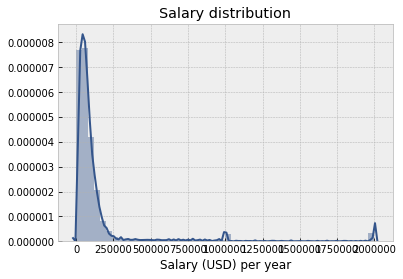

In [45]:
# Print statistics and plot salary distribution 

print(df_salary['ConvertedComp'].describe())

print("Mean salary:", int(df_salary['ConvertedComp'].mean()),
      " Median salary:", int(df_salary['ConvertedComp'].median()))

ax = sns.distplot(df_salary['ConvertedComp'], color = palette[1])
ax.set(xlabel='Salary (USD) per year')
ax.set_title('Salary distribution')

# ax.axis([0, 170, 0, 0.15])
plt.show()

 We can see that there are some outliers in the high-end (salarys of 1 and 2 millions USD!) that are causing the mean salary (136.628 USD) to diverge widely from the median (62.807 USD). We will remove those outliers as well as the zero salaries.


C:\Users\Leda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Mean salary: 68349  Median salary: 58501


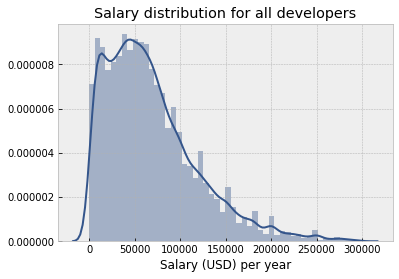

In [46]:
# Remove outliers

df_salary_high = df_salary[df_salary['ConvertedComp'] >= 300000]

df_salary_clean = df_salary[df_salary['ConvertedComp'] < 300000]
df_salary_clean = df_salary_clean[df_salary['ConvertedComp'] > 100 ]
df_salary_clean = df_salary_clean.sort_values('ConvertedComp', ascending =False)


# Print statistics and plot salary distribution after removing outliers

print("Mean salary:", int(df_salary_clean['ConvertedComp'].mean()),
      " Median salary:", int(df_salary_clean['ConvertedComp'].median()))

ax = sns.distplot(df_salary_clean['ConvertedComp'], color = palette[1])
ax.set(xlabel='Salary (USD) per year')
ax.set_title('Salary distribution for all developers')

plt.show()


Mean salary: 76366  Median salary: 66000


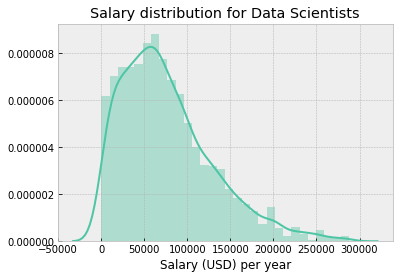

In [47]:
# Distribution of salary for data scientists on clean data
df_ds = df_salary_clean[df_salary_clean['DevType'].str.contains("Data scientist",na=False)]

df_devops = df_salary_clean[df_salary_clean['DevType'].str.contains("DevOps ",na=False)]
df_fullstack = df_salary_clean[df_salary_clean['DevType'].str.contains("full-stack",na=False)]
df_frontend = df_salary_clean[df_salary_clean['DevType'].str.contains("front-end",na=False)]
df_sre = df_salary_clean[df_salary_clean['DevType'].str.contains("reliability",na=False)]
df_designer = df_salary_clean[df_salary_clean['DevType'].str.contains("Designer",na=False)]
df_mobile = df_salary_clean[df_salary_clean['DevType'].str.contains("mobile",na=False)]
df_sysad = df_salary_clean[df_salary_clean['DevType'].str.contains("System administrator",na=False)]
df_qa = df_salary_clean[df_salary_clean['DevType'].str.contains("QA",na=False)]
df_deng = df_salary_clean[df_salary_clean['DevType'].str.contains("Engineer, data",na=False)]
df_da = df_salary_clean[df_salary_clean['DevType'].str.contains("analyst",na=False)]


print("Mean salary:", int(df_ds['ConvertedComp'].mean()),
      " Median salary:", int(df_ds['ConvertedComp'].median()))

ax = sns.distplot(df_ds['ConvertedComp'], color = palette[0])
ax.set(xlabel='Salary (USD) per year')
ax.set_title('Salary distribution for Data Scientists')

# ax.axis([0, 170, 0, 0.15])
plt.show()

## Are data scientists paid more than other developers?

In [48]:
# Remove nulls from the developer dataframes

# for d in dev_dataframes:
#     d = d.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_ds = df_ds.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_devops = df_devops.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_sysad = df_sysad.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_fullstack = df_fullstack.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_frontend = df_frontend.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_sre = df_sre.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_designer = df_designer.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_qa = df_qa.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_mobile = df_mobile.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_deng = df_deng.dropna(subset=['ConvertedComp', 'YearsCodePro'])
df_da = df_da.dropna(subset=['ConvertedComp', 'YearsCodePro'])

df_data = df_data.dropna(subset=['ConvertedComp', 'YearsCodePro'])

def get_median_salaries(dev_dataframes):
    
    salaries = []
    for d in dev_dataframes:
        salaries.append(d['ConvertedComp'].median())
    return salaries

def get_avg_years(dev_dataframes):
    
    years = []
    for d in dev_dataframes:
        years.append(d['YearsCodePro'].mean())
    return years


### Median salary to average professional coding experience by different developer role

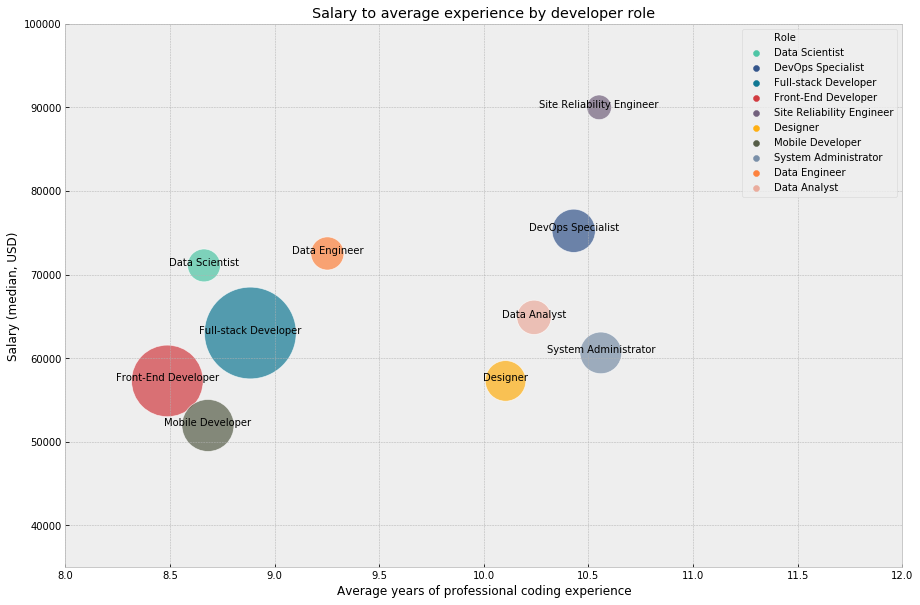

In [49]:
salaries = get_median_salaries(dev_dataframes)
years = get_avg_years(dev_dataframes)

salary_df = pd.DataFrame({
    'Count':  dev_count,
    'Salary': salaries,
    'Years':  years,
    'Role':   dev_roles
})

# Create scatter plot of ratio men to women for different developer roles

plt.figure(figsize = (15,10))

ax = sns.scatterplot(salary_df.Years, salary_df.Salary, alpha = 0.7, 
                     hue=salary_df.Role, s=salary_df.Count/4, palette=sns.color_palette(palette,salary_df.shape[0]))

ax.set(xlabel='Average years of professional coding experience', ylabel='Salary (median, USD)', 
       title='Salary to average experience by developer role')

ax.axis([8, 12, 35000, 100000])

# For each point, we add a text inside the bubble
for line in range(0, salary_df.shape[0]):
     ax.text(salary_df.Years[line], salary_df.Salary[line], salary_df.Role[line], horizontalalignment='center')

### Trend of salary median for different coding experience levels by developer role

In [50]:
dev_roles

['Data Scientist',
 'DevOps Specialist',
 'Full-stack Developer',
 'Front-End Developer',
 'Site Reliability Engineer',
 'Designer',
 'Mobile Developer',
 'System Administrator',
 'Data Engineer',
 'Data Analyst']

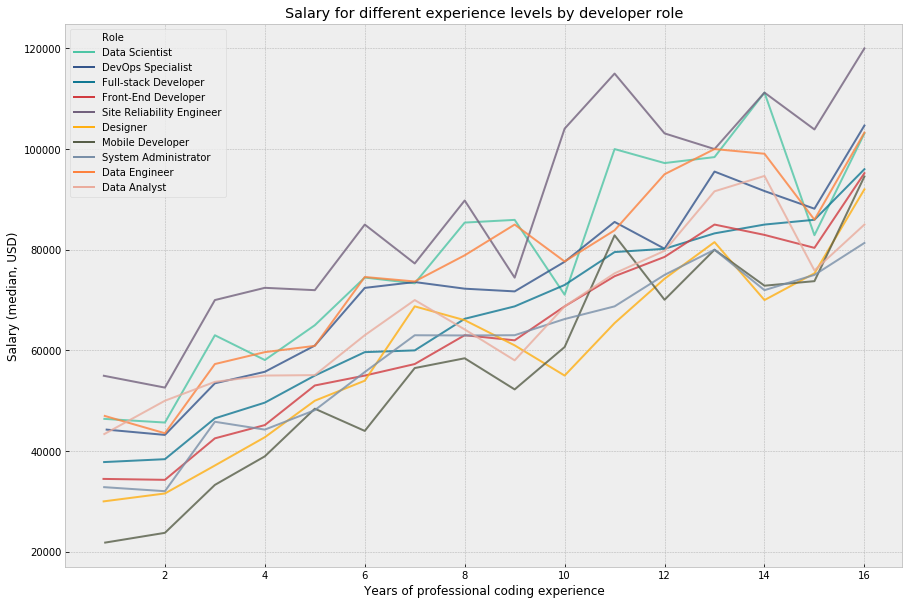

In [51]:

def plot_salary(dev_dataframes, dev_roles):   
       
    df_plot = pd.DataFrame()
    
    years = np.arange(16)
    mean = []
    salary = []
    roles = []

    for i in range(len(dev_roles)):
        
        df_dev =  dev_dataframes[i]
        role = dev_roles[i]

        for i in years:
            df_new = df_dev[df_dev['YearsCodePro'] > i ]
            df_new = df_new[df_new['YearsCodePro'] <= (i+1) ]
            mean.append(df_new['YearsCodePro'].mean())
            salary.append(df_new['ConvertedComp'].median())
            roles.append(role)

    
    df_plot['years'] = mean
    df_plot['salary'] = salary
    df_plot['Role'] = roles
    
    plt.figure(figsize = (15,10))
    
    ax = sns.lineplot(x=df_plot['years'], y=df_plot['salary'], alpha=0.8,
                      hue = df_plot['Role'], palette=sns.color_palette(palette,len(dev_roles)))
    
    ax.set(xlabel='Years of professional coding experience', ylabel='Salary (median, USD)', 
       title='Salary for different experience levels by developer role')
    
plot_salary(dev_dataframes, dev_roles)


## Features that correlate with salary for data scientists

### Create and test a linear model 

In [52]:
# Create X as all the columns that are not the Salary column
X = df_ds.drop('ConvertedComp', axis=1)
    
# Create y as the Salary column
y = df_ds['ConvertedComp']
 
# For each numeric variable in X, fill the column with the mean value of the column.
num_vars = X.select_dtypes(include=np.number).columns

for col in num_vars:
    X[col].fillna((X[col].mean()), inplace=True)
        
# Create dummy columns for all the categorical variables in X, drop the original columns 
cat_vars = X.select_dtypes(include=['object']).copy().columns
    
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

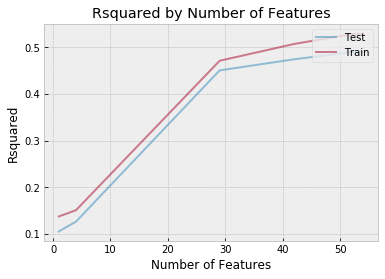

In [53]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [54]:
print(X_train.shape[1]) # Number of features
print(r2_scores_test)
best_score_pos = np.argmax(r2_scores_test)

print(r2_scores_train[best_score_pos]) # Train rsquared of the model we should implement 
print(r2_scores_test[best_score_pos]) # Test rsquared of the model we should implement 

52
[0.10516887845122369, 0.10516887845122369, 0.10516887845122369, 0.12622402010428624, 0.45032306668624034, 0.47411392778259986, 0.4895211689435054, 0.48931492990878167]
0.5280298508984071
0.4895211689435054


### Find the most  influential coefficients 

In [55]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coefs = coef_df.head(20)
coefs

,est_int,coefs,abs_coefs
18,Country_United States,70834.496756,70834.496756
9,Country_Israel,62430.428929,62430.428929
16,Country_Switzerland,55901.295368,55901.295368
1,Country_Australia,40084.295765,40084.295765
5,Country_Denmark,38504.312204,38504.312204
4,Country_Canada,33733.997117,33733.997117
17,Country_United Kingdom,31129.044943,31129.044943
7,Country_Germany,26594.226946,26594.226946
27,DevType_Data scientist or machine learning spe...,21592.668592,21592.668592
13,Country_Russian Federation,-20423.130502,20423.130502


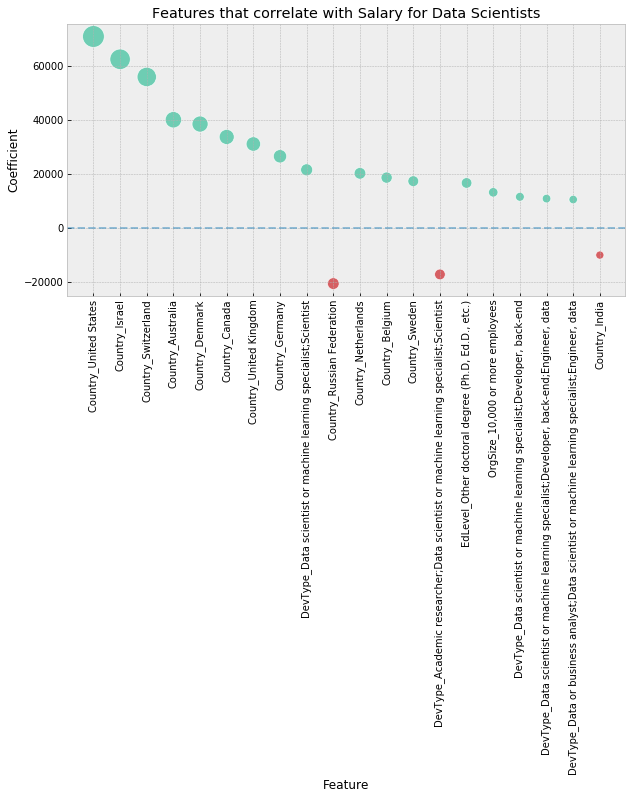

In [56]:
colors = palette[3], palette[0]
palette2 = sns.color_palette(colors)

plt.figure(figsize = (10,5))

ax = sns.scatterplot(coefs.est_int, coefs.coefs, alpha = 0.8, s=coefs.abs_coefs/150,
                     hue=np.sign(coefs.coefs), palette=palette2)

ax.set(xlabel='Feature', ylabel='Coefficient', title='Features that correlate with Salary for Data Scientists')
ax.get_legend().remove()
plt.xticks(coefs.est_int, coefs.est_int.values, rotation='vertical')
# Create a line to show the average ratio 
ax.axhline(0, ls='--', alpha=0.5)